In [160]:
import matplotlib.pyplot as plt
import pitchplots
from pitchplots.parser import xml_to_csv
from pitchplots.static import tonnetz

# Analyzing musical pieces on the Tonnetz <br /> using the *pitchplots* Python library

**20. Jahreskongress der Gesellschaft für Musiktheorie (GMTH)**

*3. Oktober, 2020, 15:00-15:25 Uhr*

Fabian C. Moss ([fabian.moss@epfl.ch](mailto:fabian.moss@epfl.ch)) & Martin Rohrmeier

<img src="img/EPFL.png" width="200px">


## Overview

1. Background
2. Installation and usage of *pitchplots*
3. Examples

## 1. Background

* In musical corpus studies, pieces are often viewed as collections of pitch classes
* Different goals:
    * key or mode finding
    * composer or style classification
    * tracing historical developments

* Here: Focus not on results but on their display
* Feedback loop from visualization to interpretation and analysis

## Running example

We use Franz Liszt's "Bénédiction de Dieu dans la Solitude", S. 173 (1847) throughout.

<img src="img/liszt_score.png" style="width:75%">

Mediantic key relations in this piece: F$\sharp$ major - D major - B$\flat$ major - F$\sharp$ major

## Pitch-class counts of "Bénédiction" 

![Liszt_profile](img/liszt_sorted.png)

## "Bénédiction" as tone profile

![Liszt_profile](img/liszt_chromatic.png)

## More sophisticated tonal spaces

"Tonnetz" from Hostinský's *Die Lehre von den musikalischen Klängen: ein Beitrag zur aesthetischen Begründung der Harmonielehre* (1879)

<img src="img/hostinsky_tonnetz.png" style="width:75%">

The Neo-Riemannian "Tonnetz"

<img src="img/nrt_tonnetz.png" style="width:60%">

Cohn, R. (1998). Introduction to Neo-Riemannian Theory: A Survey and Historical Perspective. *Journal of Music Theory* 42(2), 167-180.

### Goal

The *pitchplots* library was developed to use the spatial representation of the Tonnetz to display the tonal content of pieces without relying on the assumption that the music is fundamentally triadic.

Rather, it gives a more fine-grained overview of tones in pieces by displaying their distribution in a piece or a segment.

## 3. Installation and usage of *pitchplots*

The code and many examples how to use the library are hosted on [https://github.com/DCMLab/pitchplots](https://github.com/DCMLab/pitchplots).

1. Install the Python programming language ([python.org](python.org)), preferably using the Anaconda distribution ([anaconda.com](anaconda.com)).
2. Open a terminal and type `pip install pitchplots`
3. That's it!

The library is now accessible in your Python coding environment.

## 4. Examples

Where do I find the data?

* Several research projects provide access to symbolic encodings
* A large community-based resource is the [MuseScore](https://musescore.com) platform

## musescore.com

It is possible to download scores from this website in the MusicXML format that can be read by *pitchplots*.

<img src="img/liszt.png" style="width:650%"> 

## Data transformation

In order to read the file we have to "parse" it into a list of all notes that are in the piece.
We load a parser (file converter) that reads the MusicXML file and returns a table of all notes:

```python
from pitchplots.parser import xml_to_csv
```

We can then call the function on the exported MusicXML file and store it in a variable, e.g. `df` (for DataFrame)

```python
df = xml_to_csv("data/liszt.mxl")
```

Let's inspect `df`.

In [99]:
from pitchplots.parser import xml_to_csv

In [162]:
df = xml_to_csv("data/liszt.mxl")

df = df[df.type == "note"]

In [163]:
df.head(10)

filepath      qpm time_sign_num time_sign_den measure_no no_accs  \
3   data/liszt.mxl  70.0002             4             4          1       6   
4   data/liszt.mxl  70.0002             4             4          1       6   
5   data/liszt.mxl  70.0002             4             4          1       6   
10  data/liszt.mxl  70.0002             4             4          2       6   
11  data/liszt.mxl  70.0002             4             4          2       6   
12  data/liszt.mxl  70.0002             4             4          2       6   
13  data/liszt.mxl  70.0002             4             4          2       6   
14  data/liszt.mxl  70.0002             4             4          2       6   
15  data/liszt.mxl  70.0002             4             4          2       6   
16  data/liszt.mxl  70.0002             4             4          2       6   

     mode key_area  type note_name tpc step  acc octave  pitch  pitch_class  \
3   major        0  note       E#3  E#    E  1.0      3   53.0          5.0   
4   major        0  note       D#3  D#    D  1.0      3   51.0          3.0   
5   major        0  note       C#3  C#    C  1.0      3   49.0          1.0   
10  major        0  note       F#4  F#    F  1.0      4   66.0          6.0   
11  major        0  note       C#5  C#    C  1.0      5   73.0          1.0   
12  major        0  note       D#5  D#    D  1.0      5   75.0          3.0   
13  major        0  note       C#5  C#    C  1.0      5   73.0          1.0   
14  major        0  note       D#5  D#    D  1.0      5   75.0          3.0   
15  major        0  note       C#5  C#    C  1.0      5   73.0          1.0   
16  major        0  note       D#5  D#    D  1.0      5   75.0          3.0   

    duration     onset onset_seconds  
3   0.166667         0             0  
4   0.250000  0.333333       1.14285  
5   0.083333  0.833333       2.85713  
10  0.125000         1       3.42856  
11  0.125000         1       3.42856  
12  0.125000     1.125       3.85713  
13  0.125000      1.25        4.2857  
14  0.125000     1.375       4.71427  
15  0.125000       1.5       5.14284  
16  0.125000     1.625       5.57141

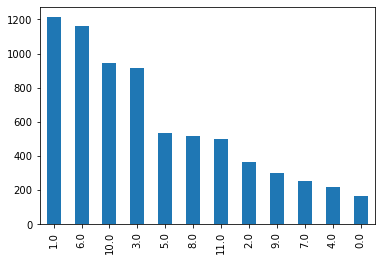

In [157]:
fix, ax = plt.subplots()
df.pitch_class.value_counts().plot(kind="bar", ax=ax)
plt.savefig("img/liszt_sorted.png");

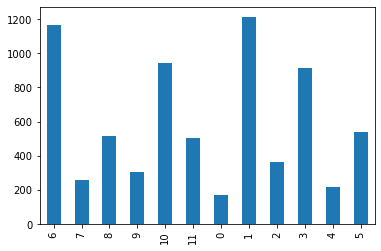

In [158]:
fix, ax = plt.subplots()
df.pitch_class.value_counts().reindex([6,7,8,9,10,11,0,1,2,3,4,5]).plot(kind="bar", ax=ax)
plt.savefig("img/liszt_chromatic.png");

In [104]:
df.tpc = df.tpc.str.replace("x", "##")

In [105]:
from pitchplots.static import tonnetz

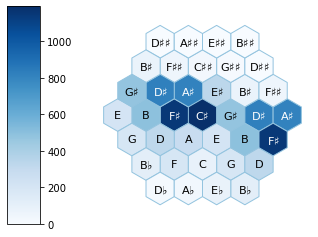

In [106]:
tonnetz(df)

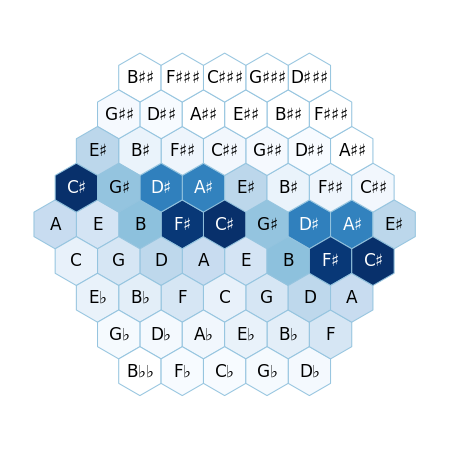

In [137]:
tonnetz(
    df,
    figsize=(8,8), 
    fontsize=2, 
    colorbar=False, 
    radius=4, 
    duplicate=True, 
    duration=False, 
    nan_color="white"
)

### Using a dictionary

It is possible to pass a dictionary of keywords to Python functions.

If, for example, the dictionary of keywords is

In [138]:
kws = {
    "figsize" : (8,8),
    "cmap" : "Reds",
    "duration" : True
}

and then calling the plotting function like this

In [ ]:
tonnetz(**kws)

is equivalent to 

In [ ]:
tonnetz(figsize=(8,8), cmap="Reds", duration=True)

This is very convenient when one wants to share the keywords between different pieces or sections.

Let's try it out!

In [134]:
kws = {
    "figsize" : (8,8),
    "cmap" : "Reds",
    "duration" : True,
    "colorbar" : False,
    "fontsize" : 1.5,
    "nan_color" : "white",
    "show" : True,
    "radius" : 4,
    "edgecolor" : "black"
}

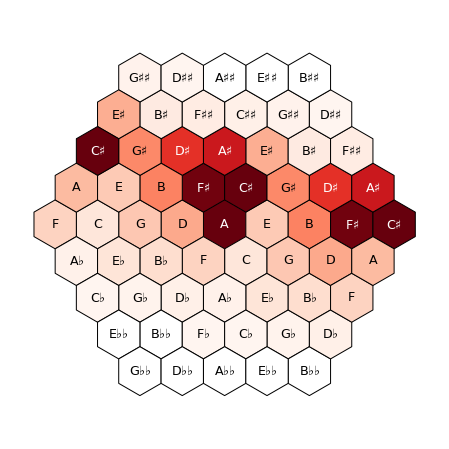

In [135]:
fig = tonnetz(df, **kws)

Sometimes we do only want to analyze specific sections of a piece.
This can be achieved with the `measures` keyword.

Liszt's piece consists of four large sections with the following keys 

* F$\sharp$ major (`measures=[1,179]`)
* D major (`measures=[180,226]`)
* B$\flat$ major (`measures=[227,256]`)
* and F$\sharp$ major (`measures=[257,367]`)

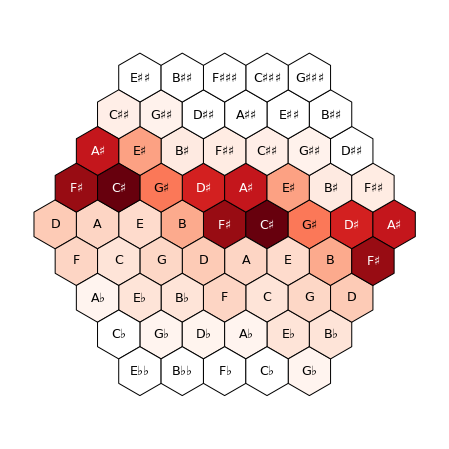

In [136]:
fig = tonnetz(df, **kws, measures=[1,179], center="F#")
fig.savefig("img/liszt_1-179.png")

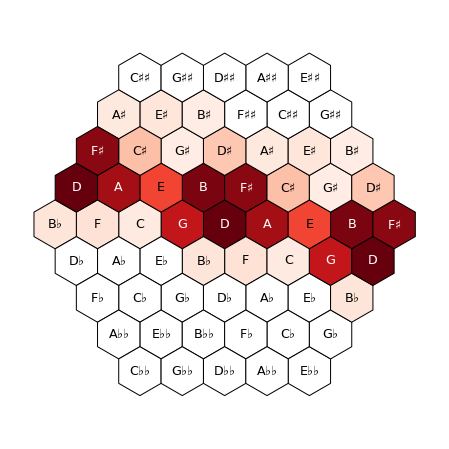

In [130]:
fig = tonnetz(df, **kws, measures=[180,226], center="D")
plt.savefig("img/liszt_180-226.png")

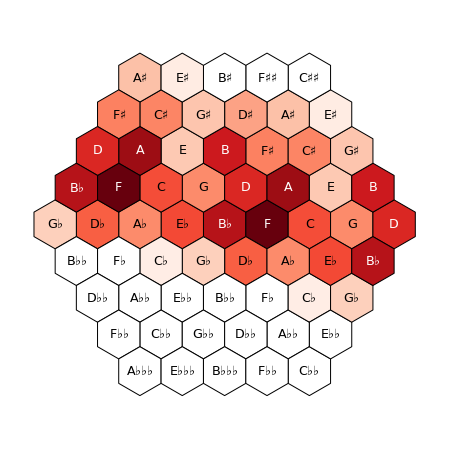

In [131]:
fig = tonnetz(df, **kws, measures=[227,256], center="Bb")
plt.savefig("img/liszt_227-256.png")

### Compare pieces and different styles

<img src="img/comparison.png" style="width:80%" class="center">

Lieck, R., Moss, F. C., & Rohrmeier, M. (in press) The Tonal Diffusion Model. *Transactions of the International Society for Music Information Retrieval*.

## Summary

* Music visualization can be an aid for music analysis

* Provides a "fingerprint" of the harmonic makeup of a piece or a section

* Can inspire further analytical inquiry

* Interpretation of plots crucially depends on music-theoretical framework 

* Looks nice in publications

* **Important:** The library is in constant development. If you have feedback and suggestions, let me know!

# Thank you very much!